# Load The Iris Dataset

In [ ]:
# Load the dataset
import pandas as pd

iris = pd.read_csv('Iris.csv')
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

## 1- Data cleaning

In [ ]:
# Count the number of missing values in each column
print(iris.isnull().sum())
print('--------------------')

# Remove rows with missing values
iris.dropna(inplace=True)

# Remove duplicates
iris.drop_duplicates(inplace=True)

print(iris.info())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
--------------------
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB
None


## 2- Feature engineering

In [ ]:
# Add 'SepalAreaCm2' to the dataset
iris['SepalAreaCm2'] = iris['SepalLengthCm'] * iris['SepalWidthCm']

# Add 'IrisSizeCm3' to the dataset
iris['IrisSizeCm3'] = iris['SepalAreaCm2'] * iris['PetalLengthCm']

## 3- Encoding

In [ ]:
# Label Encode the 'species' column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

iris = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm', 'SepalAreaCm2', 'IrisSizeCm3', 'Species']]
print(iris.head())

   SepalLengthCm  SepalWidthCm  PetalWidthCm  PetalLengthCm  SepalAreaCm2  \
0            5.1           3.5           0.2            1.4         17.85   
1            4.9           3.0           0.2            1.4         14.70   
2            4.7           3.2           0.2            1.3         15.04   
3            4.6           3.1           0.2            1.5         14.26   
4            5.0           3.6           0.2            1.4         18.00   

   IrisSizeCm3  Species  
0       24.990        0  
1       20.580        0  
2       19.552        0  
3       21.390        0  
4       25.200        0  


## 4- Scaling

In [ ]:
# Scale the iris dataset except the 'species' column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris.iloc[:, :-1] = scaler.fit_transform(iris.iloc[:, :-1])

print(iris.head())

   SepalLengthCm  SepalWidthCm  PetalWidthCm  PetalLengthCm  SepalAreaCm2  \
0      -0.915509      1.019971       -1.3357      -1.357737     -0.001997   
1      -1.157560     -0.128082       -1.3357      -1.357737     -0.935951   
2      -1.399610      0.331139       -1.3357      -1.414778     -0.835144   
3      -1.520635      0.101529       -1.3357      -1.300696     -1.066409   
4      -1.036535      1.249582       -1.3357      -1.357737      0.042477   

   IrisSizeCm3  Species  
0    -1.114649        0  
1    -1.224716        0  
2    -1.250374        0  
3    -1.204500        0  
4    -1.109408        0  


## 5- Splitting the data

In [ ]:
# Split the data 80/20
from sklearn.model_selection import train_test_split

x = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

# KNN

## 1- Initiate the model

In [ ]:
# Initiate the KNN model with n_neighbors = 5
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

## 2- Fit the model

In [ ]:
# We fit the model to the training data
knn.fit(x_train, y_train)

KNeighborsClassifier()

## 3- Evaluate the model

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score

# 1. Get predictions
y_pred = knn.predict(x_test)

# 2. Calculate accuracy (compare actual 'y' to predicted 'y')
accuracy = accuracy_score(y_test, y_pred)

print(f"The model's accuracy is: {accuracy * 100:.2f}%")

The model's accuracy is: 100.00%


## 4- The Confusion Matrix

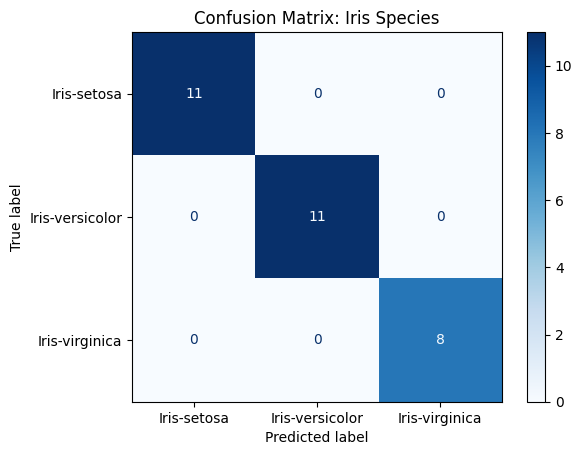

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generate the raw confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Get the actual names from your LabelEncoder (le)
# This ensures the labels match the order of your numbers (0, 1, 2)
species_names = le.classes_

# 3. Plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_names)

# Plotting with a nice color map
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Iris Species')
plt.show()

## 5- Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# This runs the model 5 different times on 5 different splits
scores = cross_val_score(knn, x, y, cv=5)

print(f"Average Accuracy: {scores.mean():.2%}")
print(f"Standard Deviation: {scores.std():.2%}")

Average Accuracy: 95.91%
Standard Deviation: 2.59%


# Choosing Diffrent n_neighbors

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-45712607.py:29: SyntaxWarning: invalid escape sequence '\s'
  alpha=0.2, color='mediumseagreen', label='Standard Deviation ($\sigma$)')


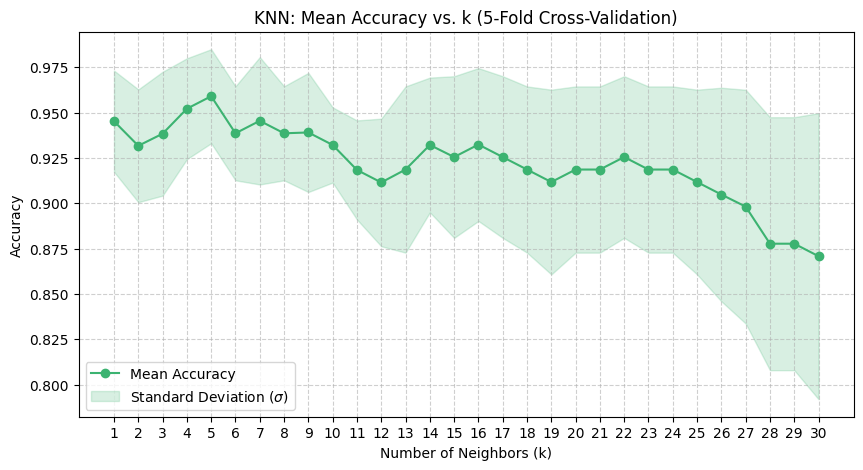

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

mean_accuracies = []
std_accuracies = []
k_range = range(1, 31)

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # Perform 5-fold cross validation
    # This automatically splits the data into 5 parts and returns 5 scores
    scores = cross_val_score(knn, x, y, cv=5)

    mean_accuracies.append(scores.mean())
    std_accuracies.append(scores.std())

# Convert to arrays for plotting
mean_accuracies = np.array(mean_accuracies)
std_accuracies = np.array(std_accuracies)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(k_range, mean_accuracies, marker='o', color='mediumseagreen', label='Mean Accuracy')

# Add the shaded region for standard deviation
plt.fill_between(k_range,
                 mean_accuracies - std_accuracies,
                 mean_accuracies + std_accuracies,
                 alpha=0.2, color='mediumseagreen', label='Standard Deviation ($\sigma$)')

plt.title('KNN: Mean Accuracy vs. k (5-Fold Cross-Validation)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

We see that the **accuracy** of the model *decreses* and the **std** *increases* as we increase the number of neighbors. This is expected as the more neighbors we add, the more flowers in different classes the model adds to his calculations, underfitting the model. The optimal is k=5.